## ECE 174 Mini Project 2
### Import packages and generate data

In [1]:
# Import packages
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy

In [2]:
# Generate training data 
X_train = np.random.uniform(-1, 1, (500, 3))
Y_train = X_train[:, 0] * X_train[:, 1] + X_train[:, 2]

### Non-linear Least Square

In [3]:
def tanh(x):
    
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [4]:
def Jacobian_W(W,X):
    
    Jacobian = np.zeros((X.shape[0],16))
    for i in range(X.shape[0]):
        val1 = W[1]*X[i][0] + W[2]*X[i][1] + W[3]*X[i][2] + W[4]
        val2 = W[6]*X[i][0] + W[7]*X[i][1] + W[8]*X[i][2] + W[9]
        val3 = W[11]*X[i][0] + W[12]*X[i][1] + W[13]*X[i][2] + W[14]

        derivative1 = 1 - tanh(val1)**2
        derivative2 = 1 - tanh(val2)**2
        derivative3 = 1 - tanh(val3)**2

        Jacobian[i] = np.array([
            tanh(val1), W[0]*X[i][0]*derivative1, W[0]*X[i][1]*derivative1, W[0]*X[i][2]*derivative1, W[0]*derivative1, 
            tanh(val2), W[5]*X[i][0]*derivative2, W[5]*X[i][1]*derivative2, W[5]*X[i][2]*derivative2, W[5]*derivative2, 
            tanh(val3), W[10]*X[i][0]*derivative3, W[10]*X[i][1]*derivative3, W[10]*X[i][2]*derivative3, W[10]*derivative3, 1])
    
    return Jacobian

In [5]:
def f_w(W,X):
    f_w = (W[0] * tanh(W[1] * X[0] + W[2] * X[1] + W[3] * X[2] + W[4])  
    + W[5] * tanh(W[6] * X[0] + W[7] * X[1] + W[8] * X[2] + W[9]) 
    + W[10] * tanh(W[11] * X[0] + W[12] * X[1] + W[13] * X[2] + W[14]) 
    + W[15])
    return f_w

def r_w(W,X,Y):
    f = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        f[i]=f_w(W, X[i,:])
    return f-Y

In [6]:
# compute the derivative matrix Dr(w) using the gradient
def gradient(W,X,Y):
    gradient = 2 * Jacobian_W(W,X).T @ r_w(W,X,Y)
    return gradient

In [7]:
# find the minimizer w with least squares
def min_w(W,X,Y,lambda_):
    
    A = Jacobian_W(W,X)
    b = r_w(W,X,Y)
    
    min_w = np.linalg.pinv(A.T @ A + lambda_ * np.identity(16)) @ A.T @ b
    return min_w

### Training the Neural Network

In [8]:
# parameter W initialization
W = np.full(16,2)
# np.random.uniform(-2, 2, (16))
# np.full(16,-1)
# np.random.randn(16)
# np.random.uniform(-1, 1, (16))

In [9]:
# find the magnitude of the vector
def mag(W):
    return math.sqrt(sum(i**2 for i in W))

In [10]:
# find the training loss of the corresponding parameters with different values of lambda
def Levenberg_Marquardt(w_current, lambda_,X_train,Y_train):
    w_next = w_current
    w_train = [10]*16
    train_loss = []
    count = 0
    
    while(np.linalg.norm(w_train-w_next)**2 > 0.1):
        
        w_train = w_current - min_w(w_current, X_train,Y_train,lambda_)
        w_next= w_current
        
        if (np.linalg.norm(r_w(w_train,X_train,Y_train))**2 < np.linalg.norm(r_w(w_current,X_train,Y_train))**2):
            lambda_  = 0.8 * lambda_
            w_current = w_train
        else:
            lambda_ = 2 * lambda_
        
        loss = np.linalg.norm(r_w(w_current,X_train,Y_train))**2 + lambda_*np.linalg.norm(w_current)**2
        train_loss.append(loss)
        count += 1
        
    return w_current,train_loss,count

In [11]:
# find the training
W_final,loss_train,count = Levenberg_Marquardt(W, 10**-5,X_train,Y_train)
r_w_train = r_w(W_final,X_train, Y_train)

# Calculate the Mean Squared Error (MSE)
print((mag(r_w_train)**2)/len(X_train))

0.03336276125337644


In [12]:
# find the gradient Dr(w)
print("gradient: \n" + str(gradient(W_final,X_train,Y_train)))
print("gradient: \n" + str(mag(gradient(W_final,X_train,Y_train))))
print("parameter W: \n" + str(W_final))

gradient: 
[-1.13141656e+00 -5.25667535e-01  6.12442154e+00 -4.20017373e+00
  4.74299249e+00 -7.67302553e-01 -2.73409895e-02  2.68934337e-03
  5.54697541e-03 -2.69988069e-02 -2.44533311e-01  6.06125218e+00
 -4.71948368e+00 -2.16125608e-01  2.10610560e+00  1.32919244e+00]
gradient: 
12.046323843032301
parameter W: 
[ 3.68178901 -0.23192415 -0.22689635  0.25883652 -0.15219103 -0.01606136
  0.40980658  0.50909957  0.76191811 -0.59526858  1.64488688  1.00744326
  0.93397226  0.1073667  -0.91690365  1.4284669 ]


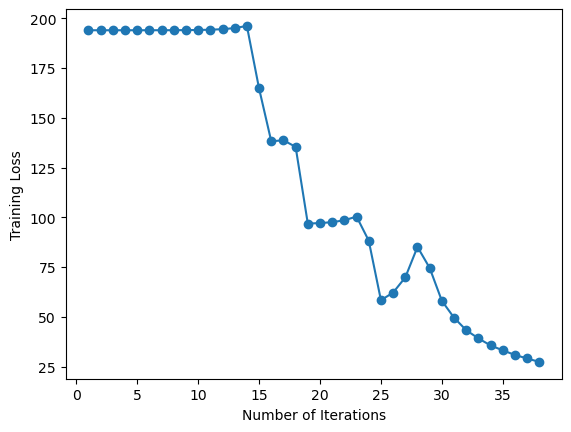

In [13]:
# plot of Number of Iterations v. Training Loss
plt.plot(np.arange(1,count+1,1),loss_train,marker='o')
plt.xlabel("Number of Iterations")
plt.ylabel("Training Loss")

plt.show()

### Testing the Neural Network

In [14]:
# Generate test data X
Tao_T = 1

X_test = np.random.uniform(low=-Tao_T,high=Tao_T,size=(100,3))

# Generate test data Y
Y_test = X_test[:, 0] * X_test[:, 1] + X_test[:, 2]

In [15]:
r_w_test = r_w(W_final,X_test,Y_test)

# Calculate the Mean Squared Error (MSE) for test data
print((mag(r_w_test)**2)/len(X_test))

0.029336295456505134


### Another non-linear function x1^2 + x2^2 + x3^2

In [651]:
X_train2 = np.random.uniform(-1, 1, (500, 3))
#Y_train2 = X_train2[:, 0]*X_train2[:, 1]+X_train2[:, 2]
Y_train2 = X_train2[:, 0]**2 + X_train2[:, 1]**2 + X_train2[:, 2]**2

In [652]:
W2 = np.random.uniform(-1, 1, (16))
# np.random.uniform(-2, 2, (16))
# W2 = np.full(16,-1)
# np.random.randn(16)
# np.random.uniform(-1, 1, (16))

In [653]:
# find the training
W_final2,loss_train2,count2 = Levenberg_Marquardt(W2, 10**-5,X_train2,Y_train2)
r_w_train2 = r_w(W_final2,X_train2, Y_train2)

# Calculate the Mean Squared Error (MSE)
print((mag(r_w_train2)**2)/len(X_train2))

0.08859606070615877


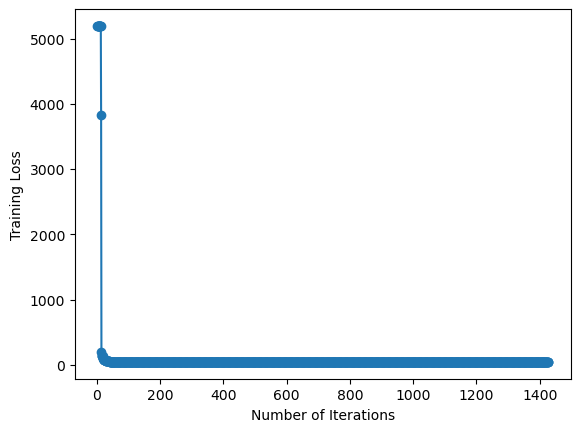

46.14901493917805


In [654]:
# plot of Number of Iterations v. Training Loss
plt.plot(np.arange(1,count2+1,1),loss_train2,marker='o')
plt.xlabel("Number of Iterations")
plt.ylabel("Training Loss")

plt.show()
print(loss_train2[-1])

In [655]:
# find the gradient Dr(w)
print("gradient: \n" + str(gradient(W_final2,X_train2,Y_train2)))
print("gradient: \n" + str(mag(gradient(W_final2,X_train2,Y_train2))))
print("parameter W: \n" + str(W_final2))

gradient: 
[-9.80359198e-03  2.26067103e-02  1.07527088e-03  2.30312657e-03
  1.41832287e-01 -9.14518836e-03 -9.08711654e-03  1.43744248e-03
 -7.46569437e-02  8.82106040e-01 -6.71018053e-04 -1.88355654e-02
  2.57378170e-04 -1.70679597e-02  1.22944663e+00  9.86639382e-03]
gradient: 
1.5221254910846174
parameter W: 
[ 1.12725776e+03  2.65973725e-01  2.56221800e-03  3.14816109e-02
 -2.89034745e+00  6.34876936e+02  1.24397565e-02  2.58225603e-03
 -1.07687483e-01 -1.64109325e+00  1.25461107e+02 -3.91152509e-02
 -2.19116841e-03  7.29414441e-02 -6.75537581e-02  1.71803645e+03]


In [691]:
# Generate test data X
Tao_T = 0.5

X_test2 = np.random.uniform(low=-Tao_T,high=Tao_T,size=(100,3))

# Generate test data Y
Y_test2 = X_test2[:, 0]**2 + X_test2[:, 1]**2 + X_test2[:, 2]**2

In [692]:
r_w_test2 = r_w(W_final2,X_test2,Y_test2)

# Calculate the Mean Squared Error (MSE) for test data
print((mag(r_w_test2)**2)/len(X_test2))

0.06900594747019334


### Add noise to the data

In [37]:
# Add noise to data with a noise level episilon
def noisy_data(X, episilon):
    noise = np.random.uniform(-episilon, episilon, (len(X),))
    Y = X[:, 0] * X[:, 1] + X[:, 2] + noise
    return Y

In [99]:
X_train_n = np.random.uniform(-1, 1, (500, 3))
Y_train_n = noisy_data(X_train_n, 5)

In [115]:
# parameter W initialization
W_noise = np.random.uniform(-1, 1, (16))
# np.random.uniform(-2, 2, (16))
# W2 = np.full(16,-1)
# np.random.randn(16)
# np.random.uniform(-1, 1, (16))

In [126]:
# find the training
W_final_noise,loss_train_noise,count_noise = Levenberg_Marquardt(W_noise, 10**-5,X_train_n,Y_train_n)
r_w_train_n = r_w(W_final_noise,X_train_n, Y_train_n)

# Calculate the Mean Squared Error (MSE)
print((mag(r_w_train_n)**2)/len(X_train_n))

8.337189881298553


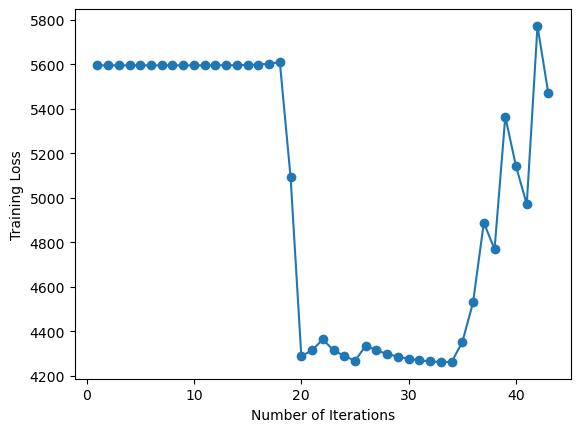

5471.600667405006


In [127]:
# plot of Number of Iterations v. Training Loss
plt.plot(np.arange(1,count_noise+1,1),loss_train_noise,marker='o')
plt.xlabel("Number of Iterations")
plt.ylabel("Training Loss")

plt.show()
print(loss_train_noise[-1])

In [148]:
Tao_T = 1
X_test_n = np.random.uniform(low=-Tao_T,high=Tao_T, size=(100, 3))
Y_test_n = noisy_data(X_test_n, 5)

In [149]:
r_w_test_n = r_w(W_final_noise,X_test_n,Y_test_n)

# Calculate the Mean Squared Error (MSE) for test data
print((mag(r_w_test_n)**2)/len(X_test_n))

8.280966239151201


### Contour plot

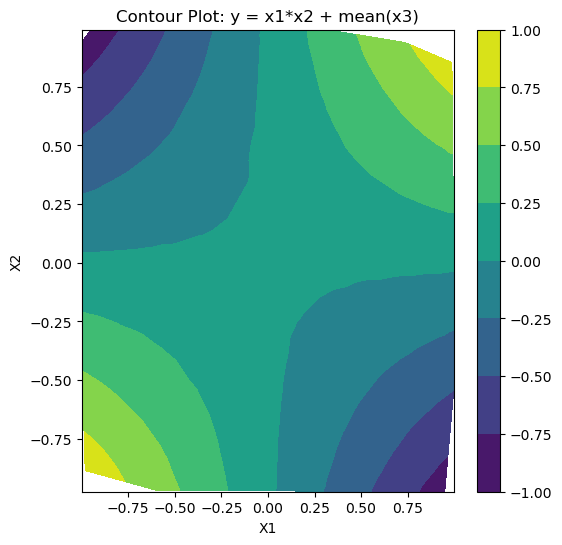

In [150]:
# Generated by ChatGPT
# Assuming that X_train is a 2D array with shape (500, 3).
x1 = X_train[:, 0] # First column
x2 = X_train[:, 1] # Second Column
x3 = np.mean(X_train[:, 2]) # Assume third feature at its mean value to get a slice

Y_train = x1*x2 + x3 # Refit the model with mean of the third feature

fig, ax = plt.subplots(figsize=(6,6))
# Drawing filled contour plot
cp = ax.tricontourf(x1, x2, Y_train)
fig.colorbar(cp) # adding a colorbar

plt.title('Contour Plot: y = x1*x2 + mean(x3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [151]:
def f_x(W,X):
    
    f_x = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        f_x[i] = W[0] * tanh(W[1]*X[i][0] + W[2]*X[i][1] + W[3]*X[i][2] + W[4]) 
        + W[5] * tanh(W[6]*X[i][0] + W[7]*X[i][1] + W[8]*X[i][2] + W[9]) 
        + W[10] * tanh(W[11]*X[i][0] + W[12]*X[i][1] + W[13]*X[i][2] + W[14]) + W[15]
    
    return f_x

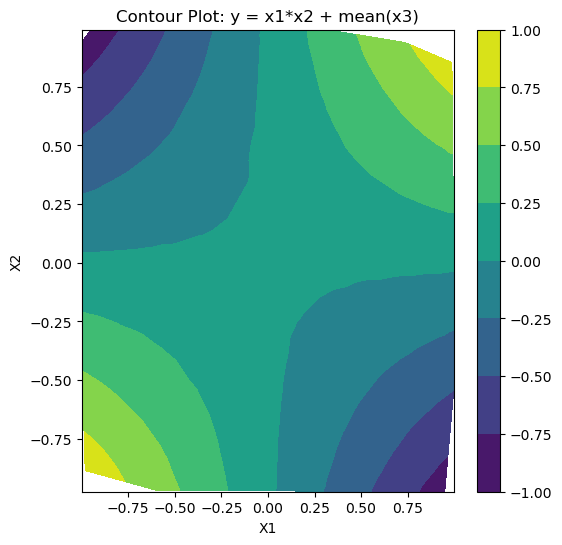

In [152]:
# With noise
# Assuming that X_train is a 2D array with shape (500, 3).
x1 = X_train[:, 0] # First column
x2 = X_train[:, 1] # Second Column
x3 = np.mean(X_train[:, 2]) # Assume third feature at its mean value to get a slice

Y_train1 = f_x(W_final,X_train) # Refit the model with mean of the third feature

fig, ax = plt.subplots(figsize=(6,6))
# Drawing filled contour plot
cp = ax.tricontourf(x1, x2, Y_train)
fig.colorbar(cp) # adding a colorbar

plt.title('Contour Plot: y = x1*x2 + mean(x3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

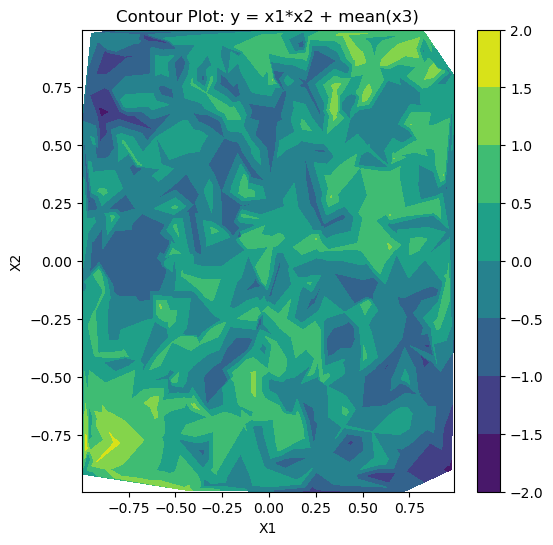

In [691]:
# Without noise
# Assuming that X_train is a 2D array with shape (500, 3).
x1 = X_train[:, 0] # First column
x2 = X_train[:, 1] # Second Column
x3 = np.mean(X_train[:, 2]) # Assume third feature at its mean value to get a slice

Y_train2 = f_x(W_final,X_train) # Refit the model with mean of the third feature

fig, ax = plt.subplots(figsize=(6,6))
# Drawing filled contour plot
cp = ax.tricontourf(x1, x2, Y_train)
fig.colorbar(cp) # adding a colorbar

plt.title('Contour Plot: y = x1*x2 + mean(x3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

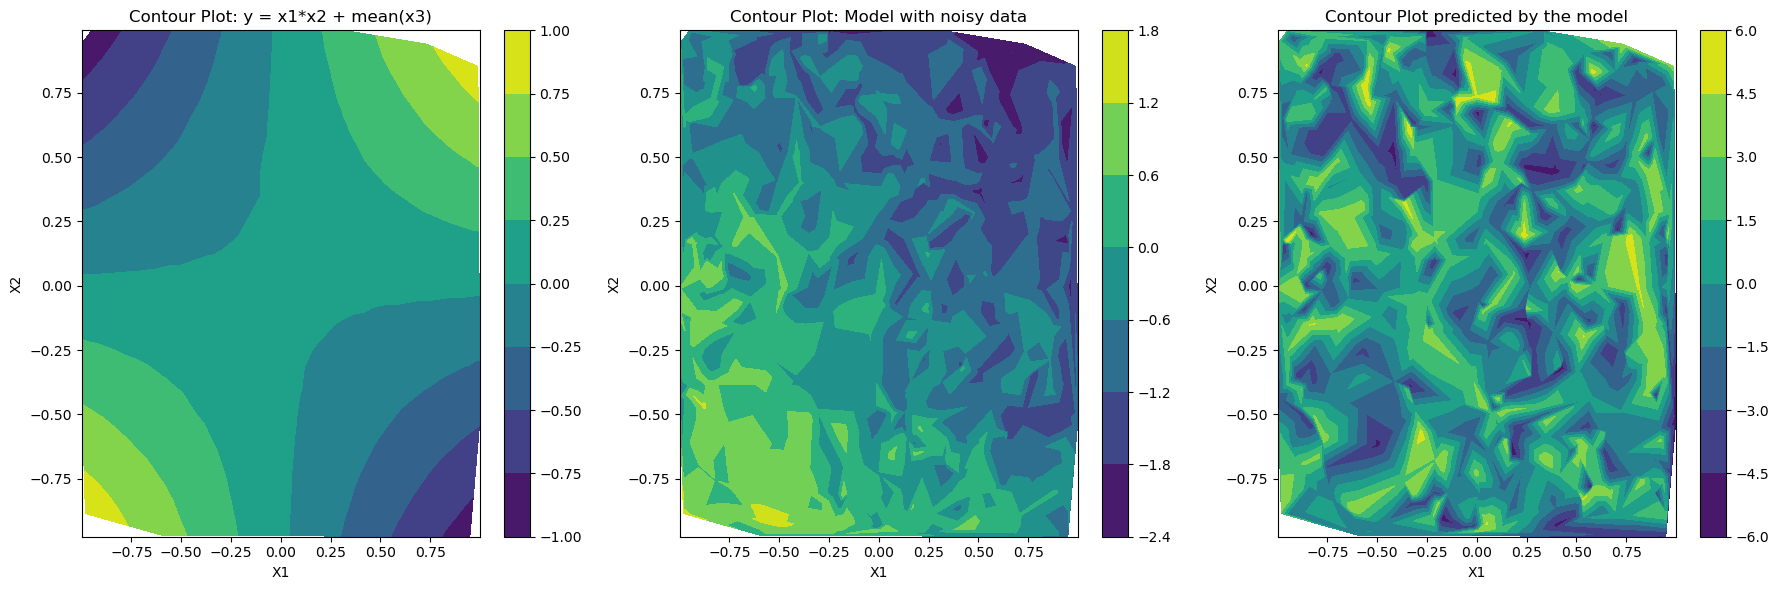

In [154]:
fig, axs = plt.subplots(1, 3, figsize=(18,6)) # 1 row, 3 columns, with specific figure size

# Assuming that Y_train2 and Y_train3 are similar to Y_train variable

# First figure
cp = axs[0].tricontourf(x1, x2, Y_train)
fig.colorbar(cp, ax=axs[0]) # adding a colorbar
axs[0].set_title('Contour Plot: y = x1*x2 + mean(x3)')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

# Second figure
cp = axs[1].tricontourf(x1, x2, Y_train1)
fig.colorbar(cp, ax=axs[1]) # adding a colorbar
axs[1].set_title('Contour Plot: Model with noisy data')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')

# Third figure
cp = axs[2].tricontourf(x1, x2, Y_train_n)
fig.colorbar(cp, ax=axs[2]) # adding a colorbar
axs[2].set_title('Contour Plot predicted by the model')
axs[2].set_xlabel('X1')
axs[2].set_ylabel('X2')

plt.tight_layout() # To handle spacing between subplots
plt.show()